In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
display(df.head())

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\Blood_samples_dataset_balanced_2(f).csv") 
# display(df.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [14]:
#encode categorical labels (Disease column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
convertedData = df.copy()  
convertedData['Disease']= le.fit_transform(df['Disease'].astype(str))
display(convertedData.head())

# information about the dataset
print(df.shape)  
print(df.info()) 
print(df.describe()) 
print(df['Disease'].unique()) 
print(df['Disease'].value_counts()) 

# Check and remove duplicates
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

#get information related null values
display(df.isnull().sum())

# Impute numerical features (if any missing)
numerical_cols = df.columns[:-1] 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())#fill null data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


(486, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin         

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [10]:
corr = convertedData.corr()
corr.style.background_gradient(cmap='coolwarm')

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
Glucose,1.000000,0.041716,-0.033918,-0.044161,0.014082,0.099692,0.017898,-0.021956,0.115377,0.020463,-0.051997,0.057148,0.053395,0.017041,-0.026571,0.059606,-0.038671,-0.003912,0.008495,0.055358,0.042778,0.034157,0.030084,-0.057289,-0.131351
Cholesterol,0.041716,1.000000,-0.082814,-0.018645,-0.037447,0.089261,0.070890,0.003759,0.078588,0.101201,-0.047341,-0.038441,-0.019163,0.062282,-0.050572,-0.014955,-0.039932,0.013919,0.006140,0.081820,0.031888,0.007317,-0.019628,0.000469,-0.032747
Hemoglobin,-0.033918,-0.082814,1.000000,-0.071351,-0.053571,-0.043260,-0.060376,0.020023,-0.014829,-0.014435,0.043210,-0.039921,-0.022898,-0.023256,-0.025783,-0.031939,-0.027649,0.020690,0.055712,-0.037836,-0.065433,0.029496,0.010196,-0.038146,-0.041784
Platelets,-0.044161,-0.018645,-0.071351,1.000000,0.006125,-0.071980,0.019951,0.029870,0.023604,-0.027918,-0.006257,0.132941,-0.059136,0.067048,0.010490,0.020551,0.026365,0.036883,-0.031587,-0.009001,-0.018892,0.003540,0.006910,-0.032405,-0.102648
White Blood Cells,0.014082,-0.037447,-0.053571,0.006125,1.000000,0.089398,0.027318,0.050894,-0.009425,-0.015990,-0.077885,0.010977,-0.027616,0.005510,-0.014424,-0.084988,0.029464,-0.031254,-0.025951,0.017316,0.009744,-0.149898,-0.050551,-0.075215,0.241368
Red Blood Cells,0.099692,0.089261,-0.043260,-0.071980,0.089398,1.000000,0.030484,-0.006270,-0.063587,-0.002481,0.005705,-0.080650,-0.060273,-0.018568,0.010618,-0.011538,-0.028023,0.042918,0.035138,-0.004586,0.056263,-0.031191,-0.043829,0.017739,0.254369
Hematocrit,0.017898,0.070890,-0.060376,0.019951,0.027318,0.030484,1.000000,0.014085,-0.012708,-0.007661,-0.050393,0.035657,-0.075840,-0.024565,0.021707,-0.037721,0.046428,-0.003095,0.015224,-0.002026,-0.060802,0.028159,-0.053756,0.013921,0.179136
Mean Corpuscular Volume,-0.021956,0.003759,0.020023,0.029870,0.050894,-0.006270,0.014085,1.000000,0.056634,0.097303,0.023160,-0.020803,0.045616,-0.051330,0.070058,0.040009,0.022514,0.042710,-0.005969,-0.037105,-0.068362,-0.038353,0.066936,0.054672,0.024293
Mean Corpuscular Hemoglobin,0.115377,0.078588,-0.014829,0.023604,-0.009425,-0.063587,-0.012708,0.056634,1.000000,0.053716,-0.066917,0.018533,0.026032,0.034992,0.017746,0.007591,-0.052265,-0.037074,0.006245,-0.023613,-0.083603,-0.036914,0.142494,-0.127203,-0.106686
Mean Corpuscular Hemoglobin Concentration,0.020463,0.101201,-0.014435,-0.027918,-0.015990,-0.002481,-0.007661,0.097303,0.053716,1.000000,-0.085051,0.007691,0.051672,-0.064274,-0.055663,0.023053,0.022143,-0.027161,-0.076798,0.032895,0.036256,-0.013566,0.005117,0.038146,-0.012350


In [15]:
# Identify highly correlated features (|corr| > 0.8)
threshold = 0.8
high_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            high_corr.add(colname)

print(f"Highly correlated features to consider dropping: {high_corr}")
# Drop correlated features (manual decision based on domain knowledge)
df_reduced = convertedData.drop(high_corr, axis=1)
display(df_reduced.head())

Highly correlated features to consider dropping: set()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


In [4]:
X = convertedData.drop(columns=["Disease"])
Y = convertedData["Disease"]
display(X,Y)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


0      4
1      1
2      3
3      1
4      3
      ..
481    1
482    3
483    0
484    1
485    1
Name: Disease, Length: 486, dtype: int64

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(x_train,x_test,y_train,y_test)
# x_train = X
# y_train = Y
# dfTest = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
# convertedDataTest = dfTest.copy()  
# convertedDataTest['Disease']= le.fit_transform(dfTest['Disease'].astype(str))
# x_test = convertedDataTest.drop(columns=["Disease"])
# y_test = convertedDataTest["Disease"]

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
57,0.551334,0.653352,0.721582,0.212011,0.454905,0.433051,0.041063,0.648097,0.847564,0.733235,...,0.313112,0.657721,0.447341,0.373722,0.542740,0.858730,0.973493,0.228962,0.779990,0.608694
150,0.756071,0.400693,0.944536,0.136298,0.259953,0.863255,0.913924,0.683604,0.062622,0.356800,...,0.783207,0.098789,0.781159,0.153515,0.314426,0.510524,0.609025,0.386171,0.313896,0.640815
334,0.707070,0.596544,0.804991,0.268919,0.564404,0.291482,0.477887,0.978602,0.908600,0.421375,...,0.374151,0.089228,0.312222,0.027459,0.973968,0.324136,0.498124,0.566144,0.834995,0.847140
381,0.817390,0.715585,0.837549,0.411671,0.745921,0.564266,0.926508,0.872914,0.225463,0.088458,...,0.880760,0.737257,0.461212,0.901982,0.079167,0.578837,0.802461,0.420355,0.174755,0.449846
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.725215,0.677808,0.987033,0.800944,0.789479,0.855967,0.210390,0.996362,0.801524,0.944379,...,0.694315,0.038605,0.234371,0.893923,0.395923,0.296394,0.065796,0.254005,0.525764,0.812486
257,0.753618,0.312916,0.862205,0.177073,0.098193,0.004038,0.714225,0.882401,0.446311,0.388375,...,0.835218,0.606299,0.386076,0.521392,0.264701,0.891256,0.457828,0.443635,0.685850,0.938585
161,0.172816,0.777480,0.723928,0.579360,0.950472,0.907626,0.874091,0.272615,0.284505,0.182421,...,0.612328,0.583795,0.576253,0.096782,0.525031,0.497269,0.168173,0.187233,0.618649,0.286173
265,0.262573,0.388028,0.868432,0.956211,0.958100,0.303553,0.720876,0.048039,0.914382,0.274420,...,0.416467,0.327349,0.882456,0.073689,0.638554,0.208671,0.977406,0.195559,0.545878,0.430618


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
420,0.570437,0.434672,0.627588,0.008648,0.820765,0.063745,0.064278,0.238362,0.510139,0.275545,...,0.721052,0.824757,0.024724,0.176773,0.436357,0.083300,0.322717,0.742776,0.222127,0.234378
462,0.479874,0.845313,0.965936,0.077068,0.287691,0.324687,0.389572,0.340042,0.352143,0.532543,...,0.804182,0.528750,0.419951,0.998761,0.722777,0.284871,0.328747,0.584855,0.704526,0.636679
145,0.420067,0.935891,0.685358,0.990885,0.696081,0.518833,0.695676,0.558759,0.886202,0.011559,...,0.305371,0.138766,0.742517,0.137290,0.952148,0.524125,0.345781,0.145804,0.653004,0.055978
378,0.231069,0.247668,0.261990,0.020575,0.276266,0.279191,0.961607,0.127406,0.479191,0.263628,...,0.350983,0.195601,0.150753,0.355638,0.959556,0.964596,0.482554,0.323641,0.852429,0.037927
370,0.522165,0.551020,0.084234,0.917105,0.424181,0.325626,0.313973,0.922609,0.881017,0.968701,...,0.687958,0.717376,0.545803,0.176908,0.675727,0.729771,0.943848,0.253436,0.925906,0.959692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.433571,0.224062,0.313793,0.054237,0.722989,0.900783,0.370730,0.734881,0.842036,0.337131,...,0.377379,0.362835,0.368853,0.116150,0.124554,0.024194,0.289215,0.144755,0.988407,0.029190
90,0.071624,0.130341,0.252934,0.874691,0.058411,0.162479,0.922165,0.537607,0.976135,0.026136,...,0.589088,0.233224,0.843909,0.741748,0.994563,0.374014,0.221333,0.523790,0.786855,0.867397
21,0.124924,0.326425,0.045912,0.558513,0.870439,0.746222,0.244098,0.375637,0.909500,0.055686,...,0.623388,0.346910,0.628164,0.979580,0.962818,0.136194,0.187921,0.090302,0.790343,0.035086
412,0.575582,0.164031,0.784251,0.624803,0.427172,0.341682,0.459278,0.037899,0.655948,0.676917,...,0.043911,0.937082,0.457501,0.073217,0.752415,0.136654,0.544179,0.631919,0.667727,0.955383


57     1
150    1
334    1
381    1
483    0
      ..
447    4
257    1
161    3
265    4
329    1
Name: Disease, Length: 388, dtype: int64

420    0
462    1
145    1
378    5
370    1
      ..
264    1
90     0
21     4
412    3
449    1
Name: Disease, Length: 98, dtype: int64

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [19]:
knn_preds = knn.predict(x_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Feature selection with SelectKBest (mutual information)
k = 15  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(x_train, y_train)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
selected_features = X.columns[selector.get_support()].tolist()
display(selected_features)

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Triglycerides',
 'AST',
 'Heart Rate']

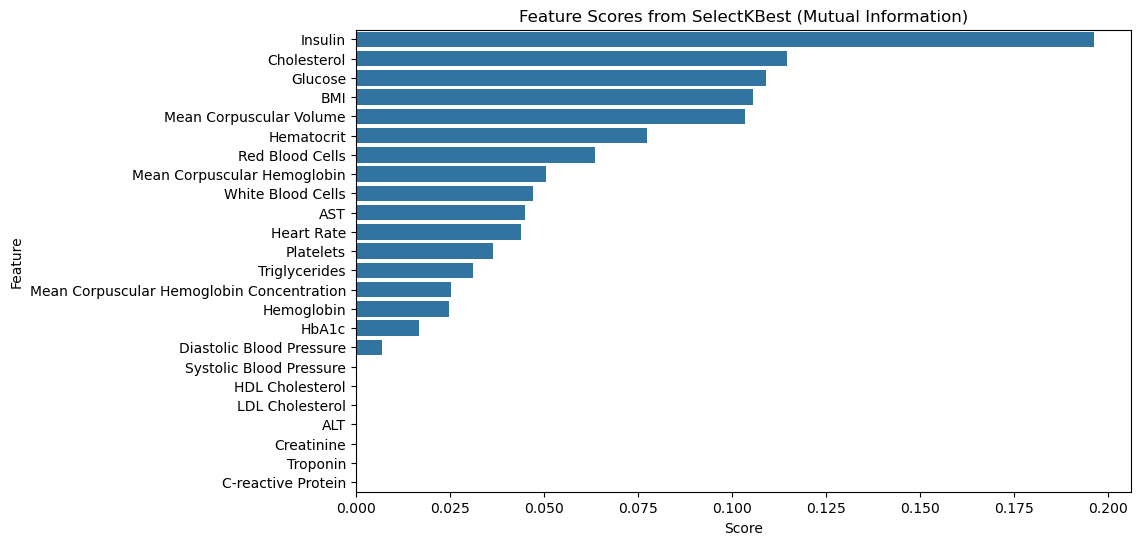

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores from SelectKBest (Mutual Information)')
plt.show()

In [30]:
# Reduce dataset to selected features
X_train_reduced = x_train[selected_features]
X_test_reduced = x_test[selected_features]

In [31]:
#second train
knn.fit(X_train_reduced, y_train)
knn_predsNew = knn.predict(X_test_reduced)

In [34]:
print(classification_report(y_test,knn_preds,zero_division=0))

              precision    recall  f1-score   support

           0       0.27      0.30      0.29        20
           1       0.66      0.75      0.70        57
           3       0.00      0.00      0.00         6
           4       0.33      0.20      0.25        10
           5       0.00      0.00      0.00         5

    accuracy                           0.52        98
   macro avg       0.25      0.25      0.25        98
weighted avg       0.47      0.52      0.49        98



In [35]:
print(classification_report(y_test,knn_predsNew,zero_division=0))

              precision    recall  f1-score   support

           0       0.40      0.60      0.48        20
           1       0.82      0.82      0.82        57
           3       0.14      0.17      0.15         6
           4       0.67      0.20      0.31        10
           5       0.00      0.00      0.00         5

    accuracy                           0.63        98
   macro avg       0.41      0.36      0.35        98
weighted avg       0.64      0.63      0.62        98



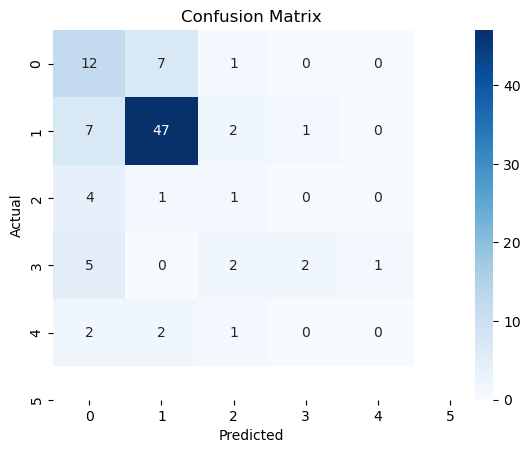

In [38]:
sns.heatmap(confusion_matrix(y_test,knn_predsNew), annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [39]:
mse = mean_squared_error(y_test,knn_predsNew)
r2Score = r2_score(y_test,knn_predsNew)
print("MSE : ",mse,"\nR2 Score : ",r2Score,"\nAccuracy:", accuracy_score(y_test, knn_predsNew))

MSE :  2.5408163265306123 
R2 Score :  -0.27040816326530615 
Accuracy: 0.6326530612244898


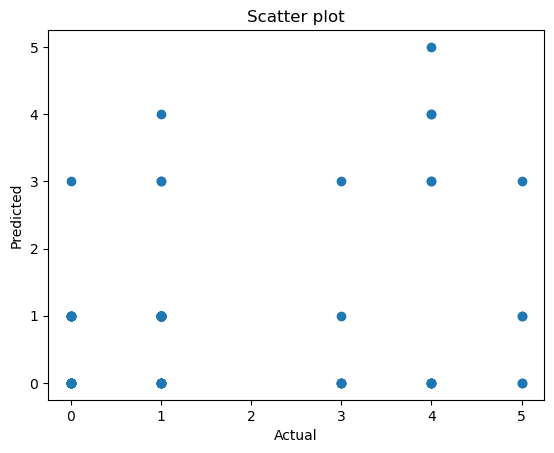

In [42]:
plt.scatter(y_test,knn_predsNew)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot")
plt.show()